# 칼로리 소모량 예측 머신러닝 모델
---
## - 2024_2학기 머신러닝[A] 기말 프로젝트
### - **프로젝트 목표**: 운동 세션 정보를 기반으로 사용자의 칼로리 소모량을 예측하는 머신러닝 모델 구현.
  - **학번**: 2011051
    - **이름**: 최준서
        - **학부** : 영미언어정보트랙 / AI응용학과
 ---

## 1. 라이브러리 및 데이터 로드
---
### 필요한 라이브러리 목록 및 설치
모델 학습 및 데이터 분석을 위해 필요한 라이브러리:
- `numpy`: 수치 연산을 위한 라이브러리.
- `pandas`: 데이터프레임 생성 및 데이터 조작.
- `matplotlib`: 데이터 시각화를 위한 라이브러리.
- `tensorflow.keras`: 신경망 모델 구현 및 학습.
- `scikit-learn`: 데이터 전처리, 모델 평가 및 성능 분석.

In [21]:
!pip install numpy pandas scikit-learn matplotlib tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 11.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 11.6 MB/s eta 0:00:0000:0100:01


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 로드
file_path = 'gym_members_exercise_tracking.csv'  # 파일 경로 수정 필요
data = pd.read_csv(file_path)

print(data.head())
print(data.info())

   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0              

## 2. 특징 선택
---
### 특징 선택 과정
- 데이터셋 변수 탐색: 변수 간 상관관계 분석 및 목표 변수와의 관계 파악.
- 선택된 변수: Age, Weight, Height, Avg BPM, Session Duration 등.
- 목표 변수: Calories Burned.



In [16]:
# 주요 변수 선택
features = ['Age', 'Weight (kg)', 'Height (m)',
            'Max_BPM', 'Avg_BPM', 'Resting_BPM',
            'Session_Duration (hours)', 'Workout_Frequency (days/week)', 'Experience_Level']
target = 'Calories_Burned'


# 데이터 분리
X = data.drop(columns=[target])
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3. 모델 정의 및 학습
---
### 신경망 모델 설계
- 모델 구조: 다층 퍼셉트론(MLP) 기반 2개 은닉층(64, 32 노드) 및 출력층 구성.
- 은닉층 활성화 함수: ReLU(Rectified Linear Unit).
- 출력층 활성화 함수: 회귀 문제를 위한 선형 활성화 함수(linear).


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 신경망 모델 정의
model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# 모델 학습
history = model.fit(X_train_scaled, y_train, epochs=300, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 867692.5000 - mae: 891.2429 - val_loss: 918935.3750 - val_mae: 923.1706
Epoch 2/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 901712.7500 - mae: 909.2265 - val_loss: 914823.1875 - val_mae: 921.0601
Epoch 3/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 895292.3125 - mae: 906.3417 - val_loss: 908270.2500 - val_mae: 917.7175
Epoch 4/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 856642.0000 - mae: 886.3128 - val_loss: 897932.6875 - val_mae: 912.4720
Epoch 5/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 855188.0000 - mae: 884.7380 - val_loss: 882154.8750 - val_mae: 904.4942
Epoch 6/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 847145.5000 - mae: 882.5381 - val_loss: 859587.8750 - val_mae: 893.0065
Epoch 7/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 809476.1250 - mae: 862.9977 - val_loss: 828940.3750 - val_mae: 877.2214
Epoch 8/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 762591.3125 - mae: 834.1

## 4. 모델 평가 및 시각화
---
### 모델 성능 평가 지표:
- 테스트 데이터에서 계산된 손실 값(Test Loss): **1327.06**.
- 테스트 데이터에서 계산된 평균 절대 오차(Test MAE): **28.27**.

### 결과 해석
1. **Test Loss**: 평균 제곱 오차(MSE)에 해당하며, 예측 값과 실제 값의 차이의 제곱 평균.
   - 낮은 손실 값(1327.06)은 모델이 실제 데이터와 가까운 예측을 했음을 나타냄.

2. **Test MAE**: 평균 절대 오차로, 예측 값과 실제 값 간의 차이의 절대값 평균.
   - 낮은 MAE 값(28.27)은 예측 값이 실제 값과의 차이가 작음을 의미.

### 학습 손실 및 검증 손실 시각화
훈련 데이터와 검증 데이터에서의 손실 감소 패턴:
- **Training Loss**: 훈련 데이터에서의 손실.
- **Validation Loss**: 검증 데이터에서의 손실.
- 손실 값이 꾸준히 감소하며, 훈련 데이터와 검증 데이터의 손실 간 차이가 크지 않음.
- 과적합(Overfitting) 징후 없음.

Test Loss: 1327.06, Test MAE: 28.27


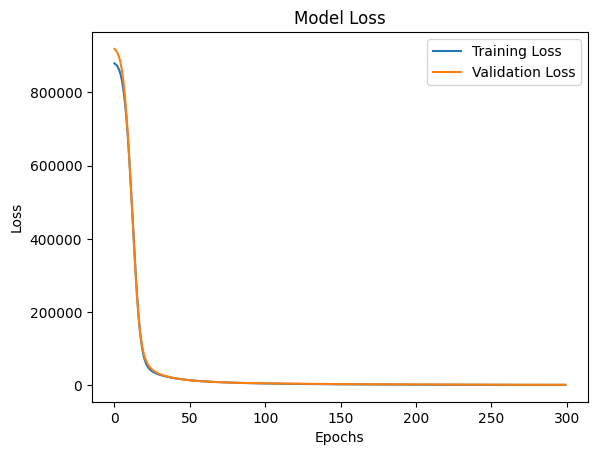

In [33]:
import matplotlib.pyplot as plt

# 평가
loss, mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Loss: {loss:.2f}, Test MAE: {mae:.2f}")

# 학습 곡선 시각화
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 6. 모델 예측 및 결과 분석
---
### 모델의 예측 성능
- 대부분의 예측 값이 실제 값과 가까운 범위에 위치하며, 예측 오차가 작음.
- 높은 정확도를 통해 모델이 소모 칼로리를 잘 예측함을 확인.

### 시각화 결과
- **Actual vs Predicted 그래프**:
  - 테스트 데이터에 대해 실제 값과 예측 값 간의 관계를 산점도로 표현.
  - 대각선에 가까운 점들의 분포는 모델이 대부분의 데이터를 정확히 예측했음을 의미.
  - 소수의 데이터에서 약간의 오차 발생.

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
   Actual    Predicted
0   929.0   873.296753
1  1401.0  1431.850098
2   925.0   996.129822
3  1155.0  1099.336670
4  1587.0  1564.557129


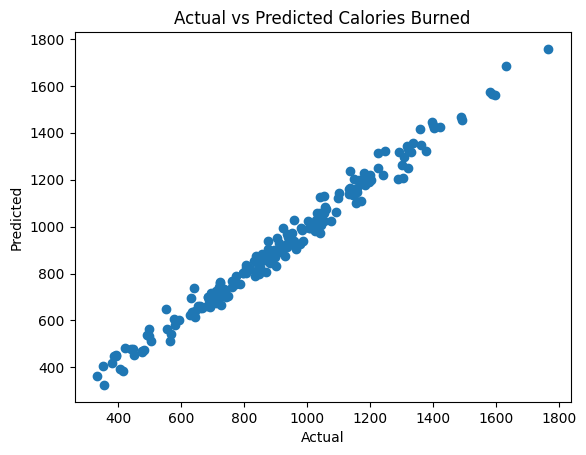

In [34]:
# 예측
y_pred = model.predict(X_test_scaled)

# 실제 값과 예측 값 비교
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred.flatten()})
print(comparison.head())

# 예측 시각화
plt.scatter(y_test, y_pred)
plt.title('Actual vs Predicted Calories Burned')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# 7. ChatGPT 활용 내역


[활용 내역 링크] (https://chatgpt.com/share/6757ba2b-8b14-8008-923c-bb7c13b2af48).